In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
# Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

In [3]:
# Apply PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('label', axis=1))
n_components = 10  # Number of principal components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(scaled_features)

In [4]:
# Apply differential privacy
def add_noise(data, epsilon):
    # Add Laplace noise to the data
    noise = np.random.laplace(scale=1/epsilon, size=data.shape)
    return data + noise

epsilon = 1.0  # Privacy parameter (you can adjust this value)
noisy_data = add_noise(pca_features, epsilon=epsilon)

In [5]:
def mean_squared_error(original_data, noisy_data):
    # Calculate Mean Squared Error (MSE)
    mse = ((original_data - noisy_data) ** 2).mean()
    return mse

# Calculate MSE
mse = mean_squared_error(pca_features, noisy_data)
print("Mean Squared Error (MSE) between original and perturbed data:", mse)


Mean Squared Error (MSE) between original and perturbed data: 1.9682859615975645


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

def mean_absolute_error(original_data, noisy_data):
    # Calculate Mean Absolute Error (MAE)
    mae = np.abs(original_data - noisy_data).mean()
    return mae

def custom_accuracy(original_data, noisy_data):
    # Binarize the data (0 if original value <= 0, 1 otherwise)
    binarized_original = np.where(original_data <= 0, 0, 1)
    binarized_noisy = np.where(noisy_data <= 0, 0, 1)
    
    # Calculate Accuracy Score
    acc_score = accuracy_score(binarized_original, binarized_noisy)
    return acc_score

# Calculate MAE and Accuracy Score
mae = mean_absolute_error(pca_features, noisy_data)
acc_score = custom_accuracy(pca_features, noisy_data)

print("Mean Absolute Error (MAE) between original and perturbed data:", mae)
print("Accuracy Score between original and perturbed data:", acc_score)


Mean Absolute Error (MAE) between original and perturbed data: 0.9852554094316617
Accuracy Score between original and perturbed data: 0.0492091388400703


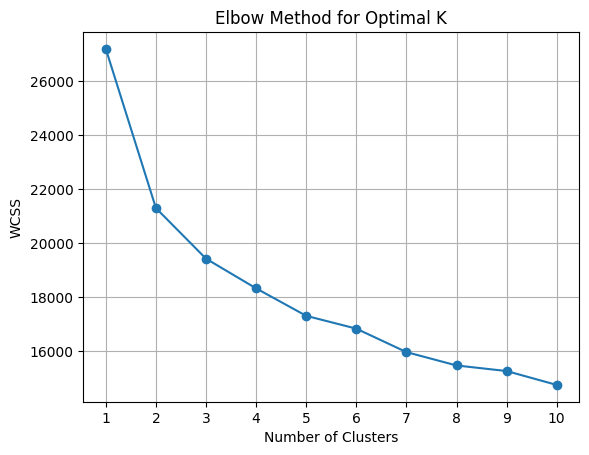

In [9]:
import matplotlib.pyplot as plt
# Function to calculate WCSS
def calculate_wcss(data, max_clusters):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Plot WCSS
max_clusters = 10  # Maximum number of clusters to try
wcss_values = calculate_wcss(noisy_data, max_clusters)

plt.plot(range(1, max_clusters + 1), wcss_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

In [11]:
# Clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    return cluster_labels

n_clusters = 2  # Number of clusters
kmeans_labels = kmeans_clustering(noisy_data, n_clusters)

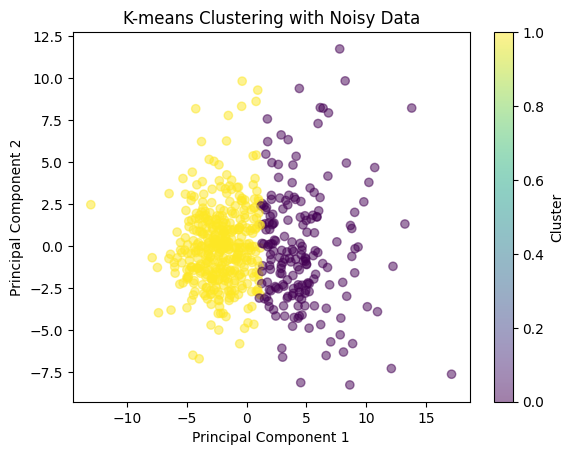

In [12]:
# Plot clustered data
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with Noisy Data')
plt.colorbar(label='Cluster')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Performance metrics
def evaluate_clustering(X, cluster_labels):
    silhouette = silhouette_score(X, cluster_labels)
    db_score = davies_bouldin_score(X, cluster_labels)
    calinski_score = calinski_harabasz_score(X, cluster_labels)
    return silhouette, db_score, calinski_score

clustering_metrics = evaluate_clustering(noisy_data, kmeans_labels)
print("Clustering Metrics:")
print("Silhouette Score:", clustering_metrics[0])
print("Davies-Bouldin Score:", clustering_metrics[1])
print("Calinski-Harabasz Score:", clustering_metrics[2])

Clustering Metrics:
Silhouette Score: 0.23156754271965815
Davies-Bouldin Score: 1.7351439764237184
Calinski-Harabasz Score: 157.18669487875218


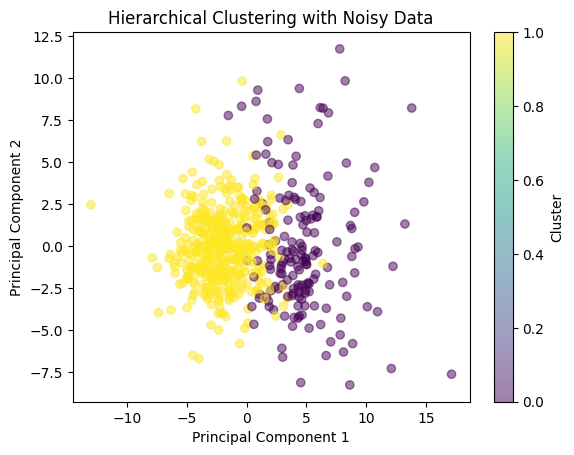

In [20]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Hierarchical clustering
def hierarchical_clustering(X, n_clusters):
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(X)
    
    return cluster_labels

# Perform hierarchical clustering
n_clusters = 2  # Number of clusters
hierarchical_labels = hierarchical_clustering(noisy_data, n_clusters)

# Plot clustered data
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering with Noisy Data')
plt.colorbar(label='Cluster')
plt.show()


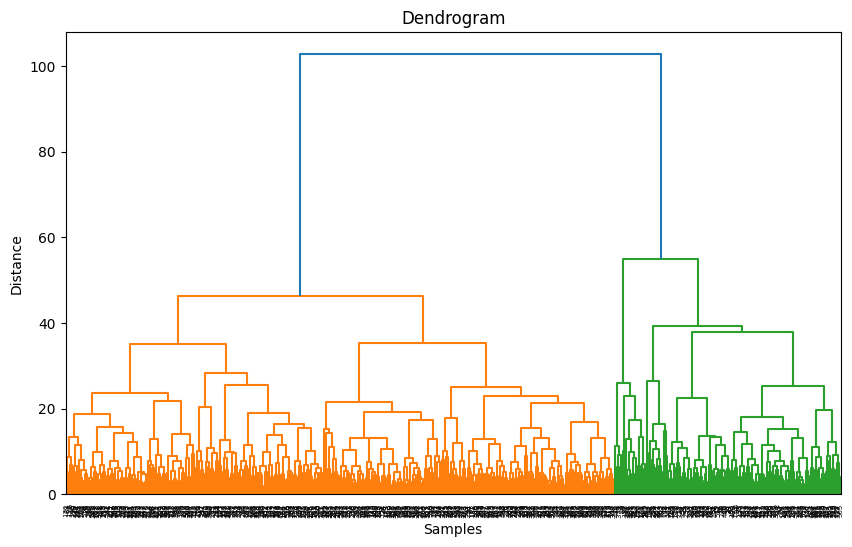

Performance Metrics:
Silhouette Score: 0.22784030672586386
Davies-Bouldin Score: 1.8134033087263202
Calinski-Harabasz Score: 136.65257360596212


In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

# Hierarchical clustering with dendrogram
def hierarchical_clustering_with_dendrogram(X, n_clusters):
    # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = hc.fit_predict(X)
    
    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()
    
    # Performance metrics
    silhouette = silhouette_score(X, cluster_labels)
    db_score = davies_bouldin_score(X, cluster_labels)
    calinski_score = calinski_harabasz_score(X, cluster_labels)
    
    return cluster_labels, silhouette, db_score, calinski_score

# Perform hierarchical clustering with dendrogram
n_clusters = 2  # Number of clusters
hierarchical_labels, silhouette, db_score, calinski_score = hierarchical_clustering_with_dendrogram(noisy_data, n_clusters)

# Print performance metrics
print("Performance Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", calinski_score)


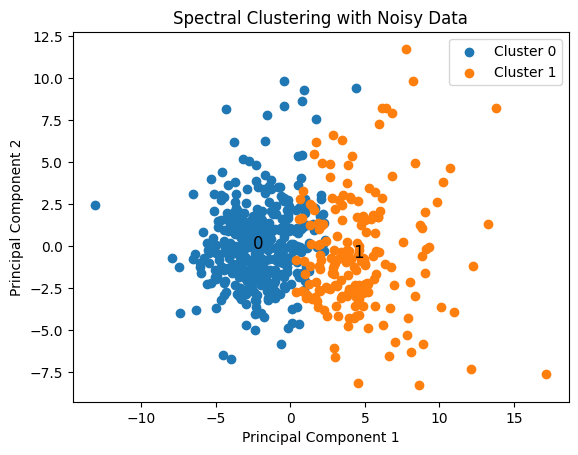

In [29]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Spectral clustering without cluster naming
def spectral_clustering(X, n_clusters):
    # Perform spectral clustering
    sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    cluster_labels = sc.fit_predict(X)
    
    # Performance metrics
    silhouette = silhouette_score(X, cluster_labels)
    db_score = davies_bouldin_score(X, cluster_labels)
    calinski_score = calinski_harabasz_score(X, cluster_labels)
    
    return cluster_labels, silhouette, db_score, calinski_score

# Perform spectral clustering without cluster naming
n_clusters = 2
spectral_labels, silhouette, db_score, calinski_score = spectral_clustering(noisy_data, n_clusters)

# Plot clustered data with cluster labels
for label in np.unique(spectral_labels):
    plt.scatter(noisy_data[spectral_labels == label, 0], noisy_data[spectral_labels == label, 1], label=f'Cluster {label}')
    
# Add cluster labels to the plot
plt.text(noisy_data[spectral_labels == 0, 0].mean(), noisy_data[spectral_labels == 0, 1].mean(), '0', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.text(noisy_data[spectral_labels == 1, 0].mean(), noisy_data[spectral_labels == 1, 1].mean(), '1', horizontalalignment='center', verticalalignment='center', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering with Noisy Data')
plt.legend()
plt.show()


In [27]:
# Print performance metrics
print("Performance Metrics:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", db_score)
print("Calinski-Harabasz Score:", calinski_score)

Performance Metrics:
Silhouette Score: 0.22459264984492988
Davies-Bouldin Score: 1.738611269193197
Calinski-Harabasz Score: 151.68537533351596
